# Introduction:
# Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.
# Occupations
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called users
# Step 4. Discover what is the mean age per occupation
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least
# Step 6. For each occupation, calculate the minimum and maximum ages
# Step 7. For each combination of occupation and sex, calculate the mean age
# Step 8. For each occupation present the percentage of women and men


In [5]:
import numpy as np
import pandas as pd

In [7]:
users = pd.read_csv('users.txt', delimiter = "|")
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [12]:
# mean age per occupation.  
mean = users.groupby('occupation')['age'].mean()
print(mean)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [13]:
# Discover the Male ratio per occupation and sort it from the most to the least

# Group by occupation
male = users[users['gender']=='M'].groupby('occupation').agg({"gender": np.size}).reset_index()
male.columns = ['occupation', 'maleCount']
female = users[users['gender']=='F'].groupby('occupation').agg({"gender": np.size}).reset_index()
female.columns = ['occupation', 'femaleCount']

#joining based on occupation
combinedGrouping = pd.merge(male, female, on="occupation", how = "outer")
combinedGrouping = combinedGrouping.fillna(0)
combinedGrouping['ratio'] = combinedGrouping['maleCount']/combinedGrouping['maleCount'] + combinedGrouping['femaleCount']
combinedGrouping = combinedGrouping.sort_values(by=["ratio"], ascending=False)
combinedGrouping

,occupation,maleCount,femaleCount,ratio
18,student,136,60.0,61.0
0,administrator,43,36.0,37.0
13,other,69,36.0,37.0
10,librarian,22,29.0,30.0
3,educator,69,26.0,27.0
20,writer,26,19.0,20.0
1,artist,15,13.0,14.0
7,healthcare,5,11.0,12.0
11,marketing,16,10.0,11.0
14,programmer,60,6.0,7.0


In [14]:
# For each occupation, calculate the minimum and maximum ages

ageGrouping = users.groupby('occupation').agg({"age": [('MinimumAge',np.min), ('MaximumAge',np.max)]}).reset_index()
ageGrouping.columns = ['Occupation', 'MinimumAge', 'MaximumAge']
       
ageGrouping

,Occupation,MinimumAge,MaximumAge
0,administrator,21,70
1,artist,19,48
2,doctor,28,64
3,educator,23,63
4,engineer,22,70
5,entertainment,15,50
6,executive,22,69
7,healthcare,22,62
8,homemaker,20,50
9,lawyer,21,53


In [15]:
# For each combination of occupation and sex, calculate the mean age.  

ageSexGrouping = users.groupby(['occupation', 'gender'])['user_id'].count().reset_index()
ageSexGrouping.columns = ['Occupation', 'Gender', 'Mean']
ageSexGrouping

,Occupation,Gender,Mean
0,administrator,F,36
1,administrator,M,43
2,artist,F,13
3,artist,M,15
4,doctor,M,7
5,educator,F,26
6,educator,M,69
7,engineer,F,2
8,engineer,M,65
9,entertainment,F,2


In [16]:
# For each occupation present the percentage of women and men. 

def percentage(var, sum):
   per = (var/sum) * 100
   per = round(per,2)
   return per

GenOccPercentage = (users.groupby(['occupation', 'gender'])['user_id'].sum()
   .groupby(level = 0).transform(lambda x: percentage(x,x.sum())).reset_index(name='Percentage'))
GenOccPercentage

# GenOccPercentage.reset_index()
# GenOccPercentage.columns = ['Occupation', 'Gender', 'Percentage']

,occupation,gender,Percentage
0,administrator,F,46.94
1,administrator,M,53.06
2,artist,F,44.40
3,artist,M,55.60
4,doctor,M,100.00
5,educator,F,26.65
6,educator,M,73.35
7,engineer,F,5.28
8,engineer,M,94.72
9,entertainment,F,21.78


# Question 2
# Euro Teams
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable called euro12
# Step 4. Select only the Goal column
# Step 5. How many team participated in the Euro2012?
# Step 6. What is the number of columns in the dataset?
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
# Step 8. Sort the teams by Red Cards, then to Yellow Cards
# Step 9. Calculate the mean Yellow Cards given per Team
# Step 10. Filter teams that scored more than 6 goals
# Step 11. Select the teams that start with G
# Step 12. Select the first 7 columns
# Step 13. Select all columns except the last 3
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [18]:
# Import the necessary libraries
import numpy as np
import pandas as pd

In [22]:
# Import the dataset from this address
# Assign it to a variable called euro12
euro12 = pd.read_csv('euro12.txt')
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [23]:
# Select only the Goal column
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [24]:
# How many team participated in the Euro2012?
print(euro12['Team'].count())

16


In [25]:
# What is the number of columns in the dataset?
len(euro12.columns)

35

In [26]:
# View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [27]:
# Sort the teams by Red Cards, then to Yellow Cards
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [28]:
# Calculate the mean Yellow Cards given per Team
yellowMean = discipline.groupby(['Team']).agg({'Yellow Cards': np.mean}).reset_index()
yellowMean.columns = ['Team', 'Mean Yellow Cards']
yellowMean

,Team,Mean Yellow Cards
0,Croatia,9.0
1,Czech Republic,7.0
2,Denmark,4.0
3,England,5.0
4,France,6.0
5,Germany,4.0
6,Greece,9.0
7,Italy,16.0
8,Netherlands,5.0
9,Poland,7.0


In [29]:
# Filter teams that scored more than 6 goals
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [30]:
# Select the teams that start with G
euro12.loc[euro12['Team'].str.startswith('G', na=False)]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [31]:
# Select the first 7 columns
euro12.iloc[:, 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [32]:
# Select all columns except the last 3
euro12.iloc[:, :-3]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [33]:
# Present only the Shooting Accuracy from England, Italy and Russia
columnIntrest = ['England', 'Italy', 'Russia']
euro12.loc[euro12['Team'].isin(columnIntrest), ['Team','Shooting Accuracy']]

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3
# Housing
# Step 1. Import the necessary libraries
# Step 2. Create 3 differents Series, each of length 100, as follows:
# • The first a random number from 1 to 4
# • The second a random number from 1 to 3
# • The third a random number from 10,000 to 30,000
# Step 3. Create a DataFrame by joinning the Series by column
# Step 4. Change the name of the columns to bedrs, bathrs, price_sqr_meter
# Step 5. Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'
# Step 6. Ops it seems it is going only until index 99. Is it true?
# Step 7. Reindex the DataFrame so it goes from 0 to 299

In [34]:
# Step 1
import pandas as pd 
import numpy as np 

In [35]:
# Step 2
Series1 = pd.Series(np.random.randint(1, 4, 100))
Series2 = pd.Series(np.random.randint(1, 3, 100))
Series3 = pd.Series(np.random.randint(10000, 30000, 100))
print("Series 1")
print(Series1)
print("Series 2")
print(Series2)
print("Series 3")
print(Series3)

Series 1
0     1
1     2
2     1
3     2
4     2
     ..
95    1
96    3
97    1
98    2
99    3
Length: 100, dtype: int32
Series 2
0     1
1     2
2     1
3     1
4     2
     ..
95    2
96    1
97    1
98    1
99    2
Length: 100, dtype: int32
Series 3
0     25175
1     29049
2     21096
3     17778
4     18191
      ...  
95    18799
96    22597
97    16809
98    20218
99    22223
Length: 100, dtype: int32


In [36]:
# Step 3
DataframeofSeries = pd.DataFrame({'Series 1':Series1,'Series 2':Series2,'Series 3':Series3})
DataframeofSeries

,Series 1,Series 2,Series 3
0,1,1,25175
1,2,2,29049
2,1,1,21096
3,2,1,17778
4,2,2,18191
...,...,...,...
95,1,2,18799
96,3,1,22597
97,1,1,16809
98,2,1,20218


In [37]:
# Step 4
ModifiedSeries =  pd.DataFrame({'bedrs':Series1,'bathrs':Series2,'price_sqr_meter':Series3})
ModifiedSeries

,bedrs,bathrs,price_sqr_meter
0,1,1,25175
1,2,2,29049
2,1,1,21096
3,2,1,17778
4,2,2,18191
...,...,...,...
95,1,2,18799
96,3,1,22597
97,1,1,16809
98,2,1,20218


In [38]:
# Step 5
bigcolumn = pd.concat([Series1,Series2,Series3],axis=0)
bigcolumn

0         1
1         2
2         1
3         2
4         2
      ...  
95    18799
96    22597
97    16809
98    20218
99    22223
Length: 300, dtype: int32

In [39]:
# Step 6
# We can see above that index is only till 99 but length is 300, We can check it too
print(len(bigcolumn))

300


In [40]:
# Step 7
print(bigcolumn.reset_index(drop=True, inplace=True))
bigcolumn

None


0          1
1          2
2          1
3          2
4          2
       ...  
295    18799
296    22597
297    16809
298    20218
299    22223
Length: 300, dtype: int32

# Question 4
# Wind Statistics
# The data have been modified to contain some missing values, identified by NaN. Using pandas should make this exercise easier, in particular for the bonus question. You should be able to perform all of these operations without using a for loop or other looping construct.
# The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71

# The first three columns are year, month, and day. The remaining 12 columns are average windspeeds in knots at 12 locations in Ireland on that day.
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from the attached file wind.txt
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].
# Step 6. Compute how many values are missing for each location over the entirerecord.They should be ignored in all calculations below.
# Step 7. Compute how many non-missing values there are in total.
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations andall the times. A single number for the entire dataset.
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days A different set of numbers for each location.
# Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day. A different set of numbers for each day.
# Step 11. Find the average windspeed in January for each location. Treat January 1961 and January 1962 both as January.
# Step 12. Downsample the record to a yearly frequency for each location.
# Step 13. Downsample the record to a monthly frequency for each location.
# Step 14. Downsample the record to a weekly frequency for each location.
# Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

In [41]:
# Step 1
import pandas as pd
import numpy as np
import datetime

In [42]:
# Step 2
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data', delim_whitespace=True)
windtable = data.rename(columns={'Yr': 'Year', 'Mo': 'Month', 'Dy': 'Day'})
windtable.head()

,Year,Month,Day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [43]:
# Step 3
DateTime = windtable['Year'].astype(str)+'/'+windtable['Month'].astype(str)+'/'+windtable['Day'].astype(str)
windtable.insert(0,'Date', DateTime)
windtable['Date'] =  pd.to_datetime(windtable['Date'])
#Deleting the rest of the 3 columns
del windtable['Year']
del windtable['Month']
del windtable['Day']
windtable.head()

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [44]:
# Step 4
def correcting_date(col_name):
    
    if col_name.year > 2000:
        year = col_name.year-100
    else:
        year = col_name.year
    return datetime.date(year,col_name.month,col_name.day)

In [45]:
windtable['Date'] = windtable['Date'].apply(correcting_date)
windtable.head()


,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [46]:
windtable['Date'].max()


datetime.date(1978, 12, 31)

In [47]:
windtable['Date'].min()

datetime.date(1961, 1, 1)

In [48]:
# Step 5
windtable.info()
# datatype is float rn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6574 non-null   object 
 1   RPT     6568 non-null   float64
 2   VAL     6571 non-null   float64
 3   ROS     6572 non-null   float64
 4   KIL     6569 non-null   float64
 5   SHA     6572 non-null   float64
 6   BIR     6574 non-null   float64
 7   DUB     6571 non-null   float64
 8   CLA     6572 non-null   float64
 9   MUL     6571 non-null   float64
 10  CLO     6573 non-null   float64
 11  BEL     6574 non-null   float64
 12  MAL     6570 non-null   float64
dtypes: float64(12), object(1)
memory usage: 667.8+ KB


In [49]:
# converting it into datetime64[ns]
windtable['Date'] = pd.to_datetime(windtable['Date'])
windtable.info()
# now daatype is what we wanted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6574 non-null   datetime64[ns]
 1   RPT     6568 non-null   float64       
 2   VAL     6571 non-null   float64       
 3   ROS     6572 non-null   float64       
 4   KIL     6569 non-null   float64       
 5   SHA     6572 non-null   float64       
 6   BIR     6574 non-null   float64       
 7   DUB     6571 non-null   float64       
 8   CLA     6572 non-null   float64       
 9   MUL     6571 non-null   float64       
 10  CLO     6573 non-null   float64       
 11  BEL     6574 non-null   float64       
 12  MAL     6570 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 667.8 KB


In [50]:
# Setting the date as index
windtable = windtable.set_index('Date')
windtable.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [51]:
# Step 6
windtable.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [52]:
# Step 7
windtable.count()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [53]:
# Step 8
windtable = windtable.dropna(axis = 0)

windtable.isna().sum()

RPT    0
VAL    0
ROS    0
KIL    0
SHA    0
BIR    0
DUB    0
CLA    0
MUL    0
CLO    0
BEL    0
MAL    0
dtype: int64

In [54]:
windtable.values.mean()

10.222465245951728

In [55]:
# Step 9
loc_min = pd.Series(windtable.min(axis=0),name="Minimum")
loc_max = pd.Series(windtable.max(axis=0),name="Maximum")
loc_mean = pd.Series(windtable.mean(axis=0),name="Mean")
loc_std = pd.Series(windtable.std(axis=0),name="Standard Deviation")

loc_stats = pd.concat([loc_min, loc_max, loc_mean, loc_std], axis=1)
loc_stats

,Minimum,Maximum,Mean,Standard Deviation
RPT,0.67,35.80,12.359979,5.618805
VAL,0.21,33.37,10.640267,5.268695
ROS,1.50,33.84,11.656396,5.007805
KIL,0.00,28.46,6.298587,3.600942
SHA,0.13,37.54,10.448923,4.933988
BIR,0.00,26.16,7.085066,3.967735
DUB,0.00,30.37,9.793006,4.978030
CLA,0.00,31.08,8.486601,4.498299
MUL,0.00,25.88,8.490257,4.165947
CLO,0.04,28.21,8.696705,4.500488


In [56]:
# Step 10
day_min = pd.Series(windtable.min(axis=1),name="Minimum")
day_max = pd.Series(windtable.max(axis=1),name="Maximum")
day_mean = pd.Series(windtable.mean(axis=1),name="Mean")
day_std = pd.Series(windtable.std(axis=1),name="Standard Deviation")

day_stats = pd.concat([day_min, day_max, day_mean, day_std], axis=1)
day_stats

,Minimum,Maximum,Mean,Standard Deviation
Date,,,,
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
1961-01-06,4.42,13.21,8.240000,2.998063
1961-01-07,4.96,14.29,10.385000,3.072114
1961-01-08,5.91,16.62,10.487500,3.547237
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


In [57]:
# Step 11
windtable = windtable.reset_index() 

January_S = windtable[windtable['Date'].dt.month == 1]
January_S = January_S.mean(axis = 0)
January_S
#windtable.loc[windtable.index.month==1].mean()

C:\Users\bhave\AppData\Local\Temp\ipykernel_35976\2789217426.py:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  January_S = January_S.mean(axis = 0)


RPT    14.831609
VAL    12.885389
ROS    13.276275
KIL     7.152477
SHA    11.644467
BIR     8.030561
DUB    11.788336
CLA     9.486962
MUL     9.511501
CLO    10.024069
BEL    14.527848
MAL    18.041826
dtype: float64

In [58]:
# Step 12
windtable.groupby(windtable['Date'].dt.year).sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Date,,,,,,,,,,,,
1961,4150.58,3470.45,3836.17,2327.79,3652.53,2589.83,3275.31,2952.87,2914.46,3298.16,4512.33,4619.65
1962,4443.47,3674.61,4240.60,2521.09,3870.60,2684.35,3997.61,3196.39,3017.47,3509.16,4700.82,5198.84
1963,4676.91,3955.50,4577.52,2675.47,4279.30,3078.67,4042.63,3772.84,3249.81,3731.92,4978.19,5474.64
1964,4525.10,3996.78,4430.20,2484.33,4192.34,2770.94,3754.85,3465.05,2850.78,3736.11,5029.04,5457.17
1965,4544.75,4042.57,4324.80,2503.34,4024.05,2729.51,3875.83,3241.17,2886.21,3620.10,4731.95,5690.95
1966,4913.62,4218.38,4387.53,2681.19,4308.84,2844.69,3861.63,3224.81,3107.77,3565.67,5207.03,5952.15
1967,4649.06,4011.71,4284.88,2607.35,4245.22,2689.38,3887.99,3403.85,3155.43,3484.81,5392.71,6254.62
1968,4331.84,3831.36,4175.97,2370.83,3938.44,2220.64,3242.46,3021.52,2644.33,2866.87,4687.96,5496.40
1969,4075.72,3549.15,3979.23,2105.31,3603.98,2259.34,3126.04,2814.66,2892.45,2830.35,4606.75,5753.46


In [59]:
# Step 13

datasample = windtable
datasample.groupby([windtable['Date'].dt.year.rename('Year'),windtable['Date'].dt.month.rename('Month')]).sum()

RPT     VAL     ROS     KIL     SHA     BIR     DUB     CLA  \
Year Month                                                                   
1961 1      377.16  291.86  336.97  177.84  273.24  212.53  270.48  225.44   
     2      426.45  390.97  376.22  240.31  358.23  283.00  308.57  305.40   
     3      287.82  299.63  281.34  191.72  277.17  231.66  245.93  251.89   
     4      321.68  282.83  299.94  174.92  253.05  194.85  207.76  212.84   
     5      280.69  237.88  295.10  167.79  265.45  185.75  214.08  229.79   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1978 8      299.00  256.04  280.00  139.59  228.41  183.99  175.16  167.95   
     9      327.41  326.85  319.05  171.75  311.16  278.35  323.71  287.49   
     10     306.83  268.80  288.17  146.36  264.28  210.00  251.58  227.47   
     11     484.55  444.08  405.24  219.52  344.25  262.29  344.77  289.72   
     12     501.44  426.19  484.69  219.94  353.36  286.49  374.40  316.04   

               MUL     CLO     BEL     MAL  
Year Month                                  
1961 1      216.41  246.75  345.02  372.88  
     2      305.46  328.29  472.29  397.82  
     3      272.70  296.72  433.79  416.31  
     4      220.27  217.11  334.42  308.35  
     5      227.38  238.97  333.54  333.53  
...            ...     ...     ...     ...  
1978 8      224.48  171.64  324.47  373.68  
     9      302.08  268.17  470.41  581.74  
     10     257.23  255.56  427.08  531.65  
     11     321.04  320.28  522.14  621.69  
     12     329.12  341.89  429.65  662.52  

[216 rows x 12 columns]

In [60]:
# Step 14
Weekly_data = windtable
Weekly_data.groupby([Weekly_data['Date'].dt.year.rename('year'),Weekly_data['Date'].dt.month.rename('Month'), Weekly_data['Date'].dt.week.rename('Week')]).sum()


C:\Users\bhave\AppData\Local\Temp\ipykernel_35976\2661923579.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Weekly_data.groupby([Weekly_data['Date'].dt.year.rename('year'),Weekly_data['Date'].dt.month.rename('Month'), Weekly_data['Date'].dt.week.rename('Week')]).sum()


RPT     VAL     ROS    KIL     SHA    BIR     DUB    CLA  \
year Month Week                                                                
1961 1     1      61.58   52.04   50.25  28.29   42.53  31.21   54.68  29.66   
           2      87.28   62.77   83.71  32.41   51.46  35.51   52.75  47.74   
           3      72.60   57.00   70.09  25.76   53.80  41.63   46.97  43.75   
           4     119.28   89.08  105.29  71.50   97.95  84.10   86.70  85.87   
           5      36.42   30.97   27.63  19.88   27.50  20.08   29.38  18.42   
...                 ...     ...     ...    ...     ...    ...     ...    ...   
1978 12    48     56.20   50.34   56.08  29.50   44.17  41.79   51.33  38.84   
           49    145.18  134.33  119.24  68.44  107.01  89.42  101.06  87.42   
           50    117.31  102.85  104.91  48.42   79.78  50.91   71.46  55.77   
           51     78.09   56.06   92.21  28.03   54.78  44.03   54.59  60.67   
           52    104.66   82.61  112.25  45.55   67.62  60.34   95.96  73.34   

                   MUL    CLO     BEL     MAL  
year Month Week                                
1961 1     1     40.75  42.14   57.08   66.13  
           2     39.99  53.00   77.88   77.17  
           3     35.35  40.16   59.96   62.08  
           4     79.90  89.53  118.80  134.33  
           5     20.42  21.92   31.30   33.17  
...                ...    ...     ...     ...  
1978 12    48    41.71  46.54   48.76   71.40  
           49    97.09  98.58  129.62  161.43  
           50    64.18  59.96   77.72  108.94  
           51    50.06  56.51   82.92  132.84  
           52    76.08  80.30   90.63  187.91  

[1123 rows x 12 columns]

In [61]:
# Step 15
Data_Calculation = Weekly_data.groupby([Weekly_data['Date'].dt.year.rename('Year'),Weekly_data['Date'].dt.week.rename('Week')]).sum()

Mean_Calculation = pd.Series(Data_Calculation.head(52).mean(axis=1))
Min_Calculation = pd.Series(Data_Calculation.head(52).min(axis=1))
Max_Calculation = pd.Series(Data_Calculation.head(52).max(axis=1))
Std_Calculation = pd.Series(Data_Calculation.head(52).std(axis=1))

C:\Users\bhave\AppData\Local\Temp\ipykernel_35976\3274191313.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Data_Calculation = Weekly_data.groupby([Weekly_data['Date'].dt.year.rename('Year'),Weekly_data['Date'].dt.week.rename('Week')]).sum()


In [62]:
Stats_Calculation = pd.DataFrame({'Minimum':Min_Calculation, 'Maximum':Max_Calculation, 'Mean':Mean_Calculation, 'Std Deviation':Std_Calculation})
Stats_Calculation

Minimum  Maximum        Mean  Std Deviation
Year Week                                             
1961 1       28.29    66.13   46.361667      12.623655
     2       32.41    87.28   58.472500      19.037546
     3       25.76    72.60   50.762500      14.248717
     4       71.50   134.33   96.860833      18.810359
     5       57.73   117.79   82.602500      19.651171
     6       75.42   152.83  111.240833      22.031887
     7       57.18   118.54   81.348333      16.366597
     8       59.67   114.13   88.230000      16.550263
     9       39.50    85.87   56.875000      12.829530
     10      31.05    96.41   58.920000      16.832939
     11      49.59   135.45   82.294167      23.242226
     12      46.54   126.94   73.240000      21.503822
     13      33.67    64.55   47.035000       9.287854
     14      41.71    95.25   65.886667      16.798883
     15      34.63    66.38   47.919167      12.626817
     16      54.38    95.34   71.026667      13.271604
     17      33.61    70.82   52.115000      13.048908
     18      69.67   122.84   92.148333      15.562041
     19      32.53    63.18   48.521667       8.512309
     20      24.98    74.17   44.715833      14.197562
     21      22.29    65.30   38.655833      13.270245
     22      44.17    95.18   64.712500      15.169920
     23      36.50    85.75   59.213333      14.958301
     24      45.64   107.46   71.216667      18.737534
     25      38.35   121.87   70.465833      24.459895
     26      28.88    62.01   44.387500      10.042572
     27      43.33    94.50   62.633333      14.685872
     28      58.89   116.76   81.663333      17.387127
     29      19.01    58.91   37.456667      12.083577
     30      40.09    96.33   66.017500      15.953680
     31      43.67    96.32   66.127500      14.698140
     32      26.17    56.37   42.025833       9.226683
     33      51.41    99.76   75.355833      14.739997
     34      49.76   115.40   84.432500      18.544842
     35      39.50    95.65   59.061667      16.105509
     36      39.80    77.24   57.307500      13.063209
     37      73.10   139.15  101.575833      21.412518
     38      29.11    69.92   44.480000      12.332153
     39      47.42    92.09   66.527500      15.267649
     40      36.84    79.87   56.239167      15.042864
     41      42.38    96.07   61.455833      16.260609
     42      75.05   165.49  108.357500      24.567914
     43      42.32    97.95   67.710000      16.844311
     44      52.79   134.37   81.290000      22.777712
     45      29.54    76.01   52.410833      17.614695
     46      31.51   118.92   53.529167      24.744003
     47      32.75    84.88   54.422500      16.038491
     48      43.72   103.08   68.283333      19.070403
     49      60.37   121.54   92.017500      20.334799
     50      60.88   105.79   88.921667      14.774988
     51      38.62   110.30   65.210000      22.223507
     52      37.61   110.63   66.936667      23.020213

# Question 5
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address.
# Step 3. Assign it to a variable called chipo.
# Step 4. See the first 10 entries
# Step 5. What is the number of observations in the dataset?
# Step 6. What is the number of columns in the dataset?
# Step 7. Print the name of all the columns.
# Step 8. How is the dataset indexed?
# Step 9. Which was the most-ordered item?
# Step 10. For the most-ordered item, how many items were ordered?
# Step 11. What was the most ordered item in the choice_description column?
# Step 12. How many items were orderd in total?
# Step 13.
# • Turn the item price into a float
# • Check the item price type
# • Create a lambda function and change the type of item price
# • Check the item price type
# Step 14. How much was the revenue for the period in the dataset?
# Step 15. How many orders were made in the period?
# Step 16. What is the average revenue amount per order?
# Step 17. How many different items are sold?

In [63]:
# Step 1
import pandas as pd
import numpy as np

In [64]:
# Step 2 & 3
chipo = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv", delimiter="\t")

In [65]:
# Step 4
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [66]:
# Step 5
chipo.shape

(4622, 5)

In [67]:
# Step 6
len(chipo.columns)

5

In [68]:
# Step 7
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [69]:
# Step 8
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [70]:
# Step 9
print("Most-Ordered Item", pd.DataFrame(chipo["item_name"].value_counts()).reset_index().loc[0, "index"])

Most-Ordered Item Chicken Bowl


In [71]:
# Step 10
print("Number of Orders for Most-Ordered Item is", pd.DataFrame(chipo["item_name"].value_counts()).reset_index().loc[0, "item_name"])

Number of Orders for Most-Ordered Item is 726


In [72]:
# Step 11
print("Most-Ordered Item is", pd.DataFrame(chipo["choice_description"].value_counts()).reset_index().loc[0, "index"])

Most-Ordered Item is [Diet Coke]


In [73]:
# Step 12
chipo.quantity.sum()

4972

In [74]:
# Step 13
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:]))
chipo["item_price"].dtypes

dtype('float64')

In [75]:
# Step 14
chipo["revenue"] = chipo["quantity"] * chipo["item_price"]
print("Total Revenue: ", chipo["revenue"].sum())

Total Revenue:  39237.02


In [76]:
# Step 15
print("Total Orders: ", len(chipo["order_id"].unique()))

Total Orders:  1834


In [77]:
# Step 16
chipo.groupby("order_id")["revenue"].mean()

order_id
1        2.890000
2       33.960000
3        6.335000
4       10.500000
5        6.850000
          ...    
1830    11.500000
1831     4.300000
1832     6.600000
1833    11.750000
1834     9.583333
Name: revenue, Length: 1834, dtype: float64

In [78]:
# Step 17
print("Total unique items: ", len(chipo["item_name"].unique()))

Total unique items:  50


# Question 6
# Create a line plot showing the number of marriages and divorces per capita in the U.S. between 1867 and 2014. Label both lines and show the legend.
# Don't forget to label your axes!

In [122]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [123]:
# Loading the dataset
US_Marriages_Divorces = pd.read_csv("us-marriages-divorces-1867-2014.csv")

In [124]:
# Showing the number of rows and columns
US_Marriages_Divorces.shape

(145, 6)

In [125]:
US_Marriages_Divorces.head()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
0,1867,357000.0,10000.0,36970000,9.7,0.3
1,1868,345000.0,10000.0,37885000,9.1,0.3
2,1869,348000.0,11000.0,38870000,9.0,0.3
3,1870,352000.0,11000.0,39905000,8.8,0.3
4,1871,359000.0,12000.0,41010000,8.8,0.3


In [126]:
# Showing the last 5 rows of dataset
US_Marriages_Divorces.tail()

,Year,Marriages,Divorces,Population,Marriages_per_1000,Divorces_per_1000
140,2007,2197000.0,856000.0,301696000,7.3,2.8
141,2008,2157000.0,844000.0,304543000,7.1,2.8
142,2009,2080000.0,840000.0,307240000,6.8,2.7
143,2010,2096000.0,872000.0,309776000,6.8,2.8
144,2011,2118000.0,877000.0,312034000,6.8,2.8


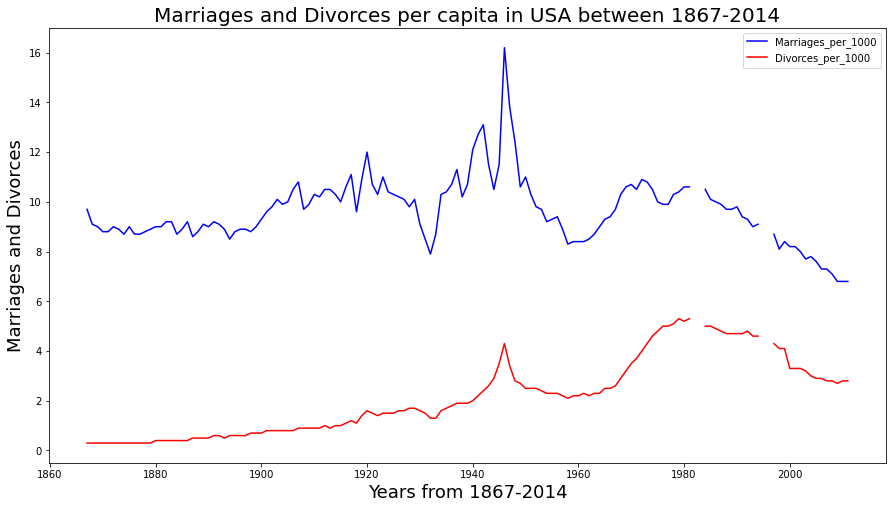

In [127]:
# Creating the line plot with legends
US_Marriages_Divorces.plot.line(x= "Year", y=["Marriages_per_1000", "Divorces_per_1000"], color =['blue','red'], figsize=(15,8)) 
plt.xlabel('Years from 1867-2014', fontsize = 18) 
plt.ylabel('Marriages and Divorces', fontsize = 18) 
plt.title("Marriages and Divorces per capita in USA between 1867-2014", fontsize=20) 
plt.legend()
plt.show()

# Question 7
# Create a vertical bar chart comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000.
# Don't forget to label your axes!

In [85]:
US_Marriages_Divorces = US_Marriages_Divorces[(US_Marriages_Divorces.Year == 1900) | (US_Marriages_Divorces.Year == 1950) | (US_Marriages_Divorces.Year == 2000)]
US_Marriages_Divorces = US_Marriages_Divorces.drop(columns = ['Marriages', 'Divorces', 'Population'])
US_Marriages_Divorces = US_Marriages_Divorces.set_index('Year')
US_Marriages_Divorces

,Marriages_per_1000,Divorces_per_1000
Year,,
1900,9.3,0.7
1950,11.0,2.5
2000,8.2,3.3


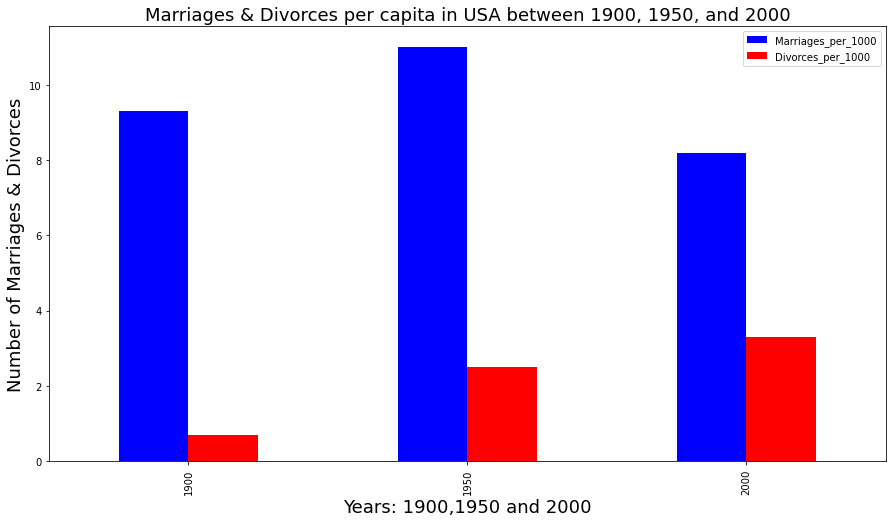

In [120]:
# Plot the barchart
US_Marriages_Divorces.plot.bar(figsize=(15,8),color =['blue','red']) 
plt.xlabel('Years: 1900,1950 and 2000', fontsize = 18) 
plt.ylabel('Number of Marriages & Divorces', fontsize = 18) 
plt.title("Marriages & Divorces per capita in USA between 1900, 1950, and 2000", fontsize=18) 
plt.legend() 
plt.show() 

# Question 8
# Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort the actors by their kill count and label each bar with the corresponding actor's name.
# Don't forget to label your axes!

In [114]:
# Loading the data which is in csv format
Data = pd.read_csv('actor_kill_counts.csv') 

In [115]:
# Sorting by count 
Sort = Data.sort_values(by="Count")

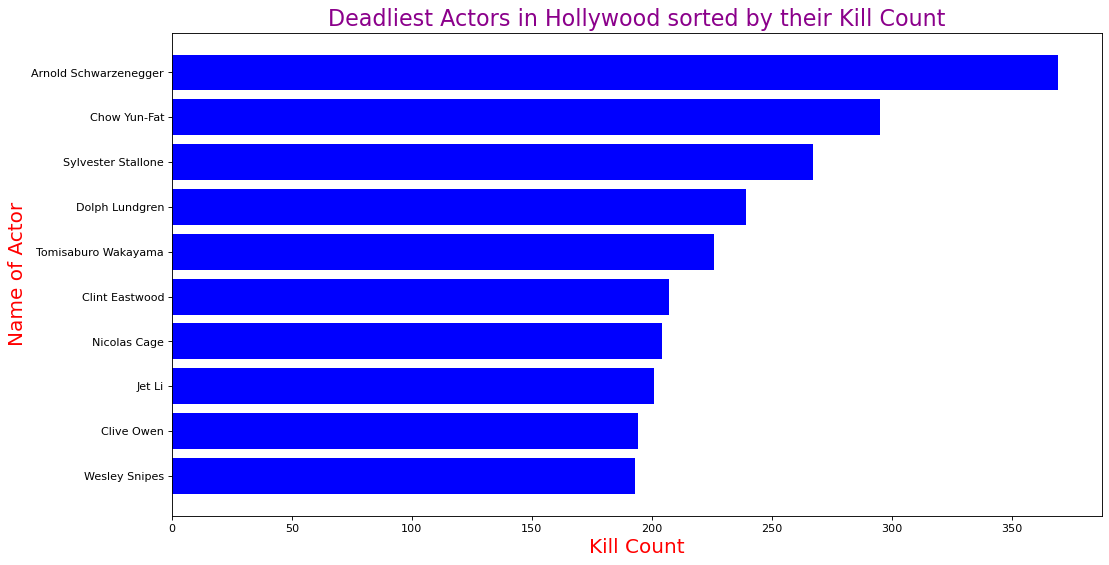

In [118]:
# Plotting the horizontal bar chart
plt.figure(figsize=(15,8), dpi= 80) 
plt.barh(Sort['Actor'], Sort['Count'],  color='blue')
plt.xlabel('Kill Count', fontsize = 18, color='red') 
plt.ylabel('Name of Actor', fontsize = 18,color='red') 
plt.title("Deadliest Actors in Hollywood sorted by their Kill Count", fontsize=20,color='darkmagenta') 
plt.show()

# Q 9
# Create a pie chart showing the fraction of all Roman Emperors that were assassinated.
# Make sure that the pie chart is an even circle, labels the categories, and shows the percentage breakdown of the categories.

In [108]:
# Loading the data which is in csv format
Emperors_Reigns = pd.read_csv('roman-emperor-reigns.csv')

In [109]:
# showing emperors who were asssasinated
Assassination = Emperors_Reigns[Emperors_Reigns.Cause_of_Death == 'Assassinated']
Assassination

,Emperor,Length_of_Reign,Cause_of_Death
2,Caligula,4.83,Assassinated
5,Galba,0.58,Assassinated
7,Vitellius,0.67,Assassinated
10,Domitian,15.00,Assassinated
17,Commodus,15.00,Assassinated
18,Pertinax,0.25,Assassinated
21,Caracalla,19.00,Assassinated
22,Geta,3.00,Assassinated
24,Elagabalus,3.75,Assassinated
25,Severus Alexander,13.00,Assassinated


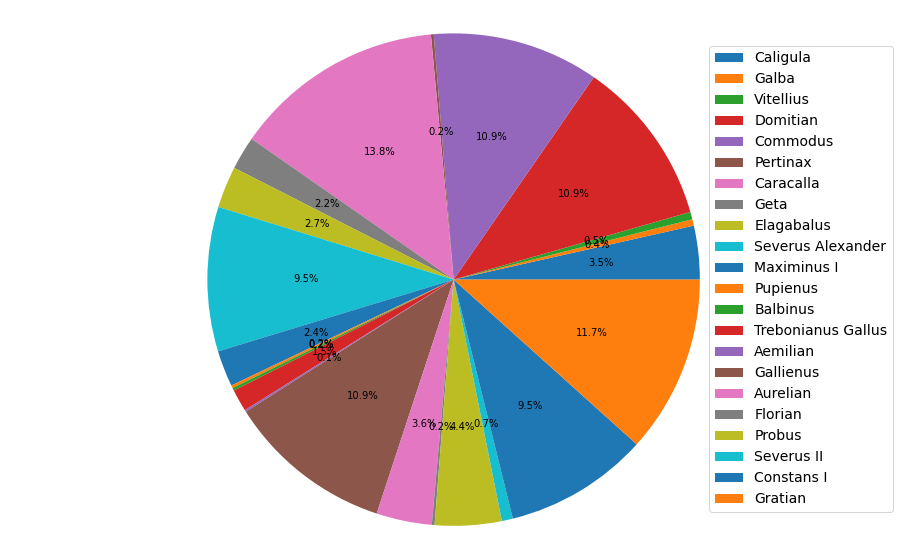

In [110]:
# Plotting the Pie Chart
l = Assassination.Emperor 
s = Assassination.Length_of_Reign
fig, ax = plt.subplots(figsize=(16,10))
plt.pie(s, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 10})
plt.axis('equal')
plt.legend( l, loc="right", fontsize = 14)
plt.show()

# Question 10
# Create a scatter plot showing the relationship between the total revenue earned by arcades and the number of Computer Science PhDs awarded in the U.S. between 2000 and 2009.
# Don't forget to label your axes!
# Color each dot according to its year.

In [111]:
# Loading the data which is in csv format
A = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

In [112]:
# Showing the data
A

,Year,Total Arcade Revenue (billions),Computer Science Doctorates Awarded (US)
0,2000,1.196,861
1,2001,1.176,830
2,2002,1.269,809
3,2003,1.240,867
4,2004,1.307,948
5,2005,1.435,1129
6,2006,1.601,1453
7,2007,1.654,1656
8,2008,1.803,1787
9,2009,1.734,1611


In [99]:
# Importing Plotly
import plotly.express as px

In [113]:
# Plotting the scatter plot
fig = px.scatter(A, x="Total Arcade Revenue (billions)", y="Computer Science Doctorates Awarded (US)", title= "Total revenue earned by arcades VS number of Computer Science PhDs awarded in U.S. between 2000 and 2009",color="Year")
fig.show()